#Importing Packages and Datase

In [1]:
#Install catboost 
!pip install catboost

# necessary imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline

#Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 7.2 MB/s eta 0:00:00
Mounted at /content/drive


In [2]:
# loading data
df= pd.read_csv(r'/content/drive/MyDrive/Final Year Project/dataset_cleaned.csv')
df.head()

,id,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,0,48,80,1.020,1,0,1,1,0,0,...,44,7800,5.2,1,1,0,0,0,0,0
1,1,7,50,1.020,4,0,1,1,0,0,...,38,6000,5.3,0,0,0,0,0,0,0
2,2,62,80,1.010,2,3,1,1,0,0,...,31,7500,3.7,0,1,0,1,0,1,0
3,3,48,70,1.005,4,0,1,0,1,0,...,32,6700,3.9,1,0,0,1,1,1,0
4,4,51,80,1.010,2,0,1,1,0,0,...,35,7300,4.6,0,0,0,0,0,0,0


In [3]:
df.shape

(400, 26)

In [4]:
# dropping id column
df.drop('id', axis = 1, inplace = True)

In [5]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48,80,1.020,1,0,1,1,0,0,121,...,44,7800,5.2,1,1,0,0,0,0,0
1,7,50,1.020,4,0,1,1,0,0,88,...,38,6000,5.3,0,0,0,0,0,0,0
2,62,80,1.010,2,3,1,1,0,0,423,...,31,7500,3.7,0,1,0,1,0,1,0
3,48,70,1.005,4,0,1,0,1,0,117,...,32,6700,3.9,1,0,0,1,1,1,0
4,51,80,1.010,2,0,1,1,0,0,106,...,35,7300,4.6,0,0,0,0,0,0,0


In [6]:
df.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,51.585000,76.500000,1.017213,0.992500,0.427500,0.812500,0.767500,0.105000,0.055000,148.650000,...,38.995000,8374.500000,4.715250,0.367500,0.34250,0.085000,0.205000,0.190000,0.150000,0.375000
std,17.090142,13.590871,0.005745,1.342367,1.061868,0.390801,0.422955,0.306937,0.228266,77.686198,...,9.109469,2930.754691,1.017167,0.482728,0.47514,0.279231,0.404207,0.392792,0.357519,0.484729
min,2.000000,50.000000,1.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,...,9.000000,2200.000000,2.100000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,99.000000,...,32.000000,6500.000000,4.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,122.000000,...,40.000000,7950.000000,4.800000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,64.250000,80.000000,1.020000,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000,169.000000,...,46.000000,9800.000000,5.425000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,1.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,490.000000,...,54.000000,26400.000000,8.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      400 non-null    int64  
 1   blood_pressure           400 non-null    int64  
 2   specific_gravity         400 non-null    float64
 3   albumin                  400 non-null    int64  
 4   sugar                    400 non-null    int64  
 5   red_blood_cells          400 non-null    int64  
 6   pus_cell                 400 non-null    int64  
 7   pus_cell_clumps          400 non-null    int64  
 8   bacteria                 400 non-null    int64  
 9   blood_glucose_random     400 non-null    int64  
 10  blood_urea               400 non-null    float64
 11  serum_creatinine         400 non-null    float64
 12  sodium                   400 non-null    float64
 13  potassium                400 non-null    float64
 14  haemoglobin              4

In [8]:
# Extracting categorical and numerical columns

cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

In [9]:
# looking at unique values in categorical columns

for col in num_cols:
    print(f"{col} has {df[col].unique()} values\n")

age has [48  7 62 51 60 68 24 52 53 50 63 40 47 61 21 42 75 69 57 73 70 65 76 72
 82 46 45 35 54 11 59 67 15 55 44 26 64 56  5 74 38 58 71 34 17 12 33 43
 41  8 39 66 81 14 27 83 30  4  3  6 32 80 49 90 78 19  2 36 37 23 25 20
 29 28 22 79] values

blood_pressure has [ 80  50  70  90 100  60 110 140 180 120] values

specific_gravity has [1.02  1.01  1.005 1.015 1.025] values

albumin has [1 4 2 3 0 5] values

sugar has [0 3 4 1 2 5] values

red_blood_cells has [1 0] values

pus_cell has [1 0] values

pus_cell_clumps has [0 1] values

bacteria has [0 1] values

blood_glucose_random has [121  88 423 117 106  74 100 410 138  70 490 380 208  98 157  76  99 114
 263 173  95 176 162 108 156 264 123 298  93 107 159 140 171 270  92 137
 219 118 204  79 207 124 248 144  91 129 246 139 119 253 184 141 182  86
 150 146 425 112 250 360 163 105 133 102 158 165 132 104 127 172 415 169
 251 109 280 210 295  94 101 153 226 143 115  89 297 233 294 241 303 323
 125  90 308 224 128  81 122 214 213 268 25

# Removing Ambiguity

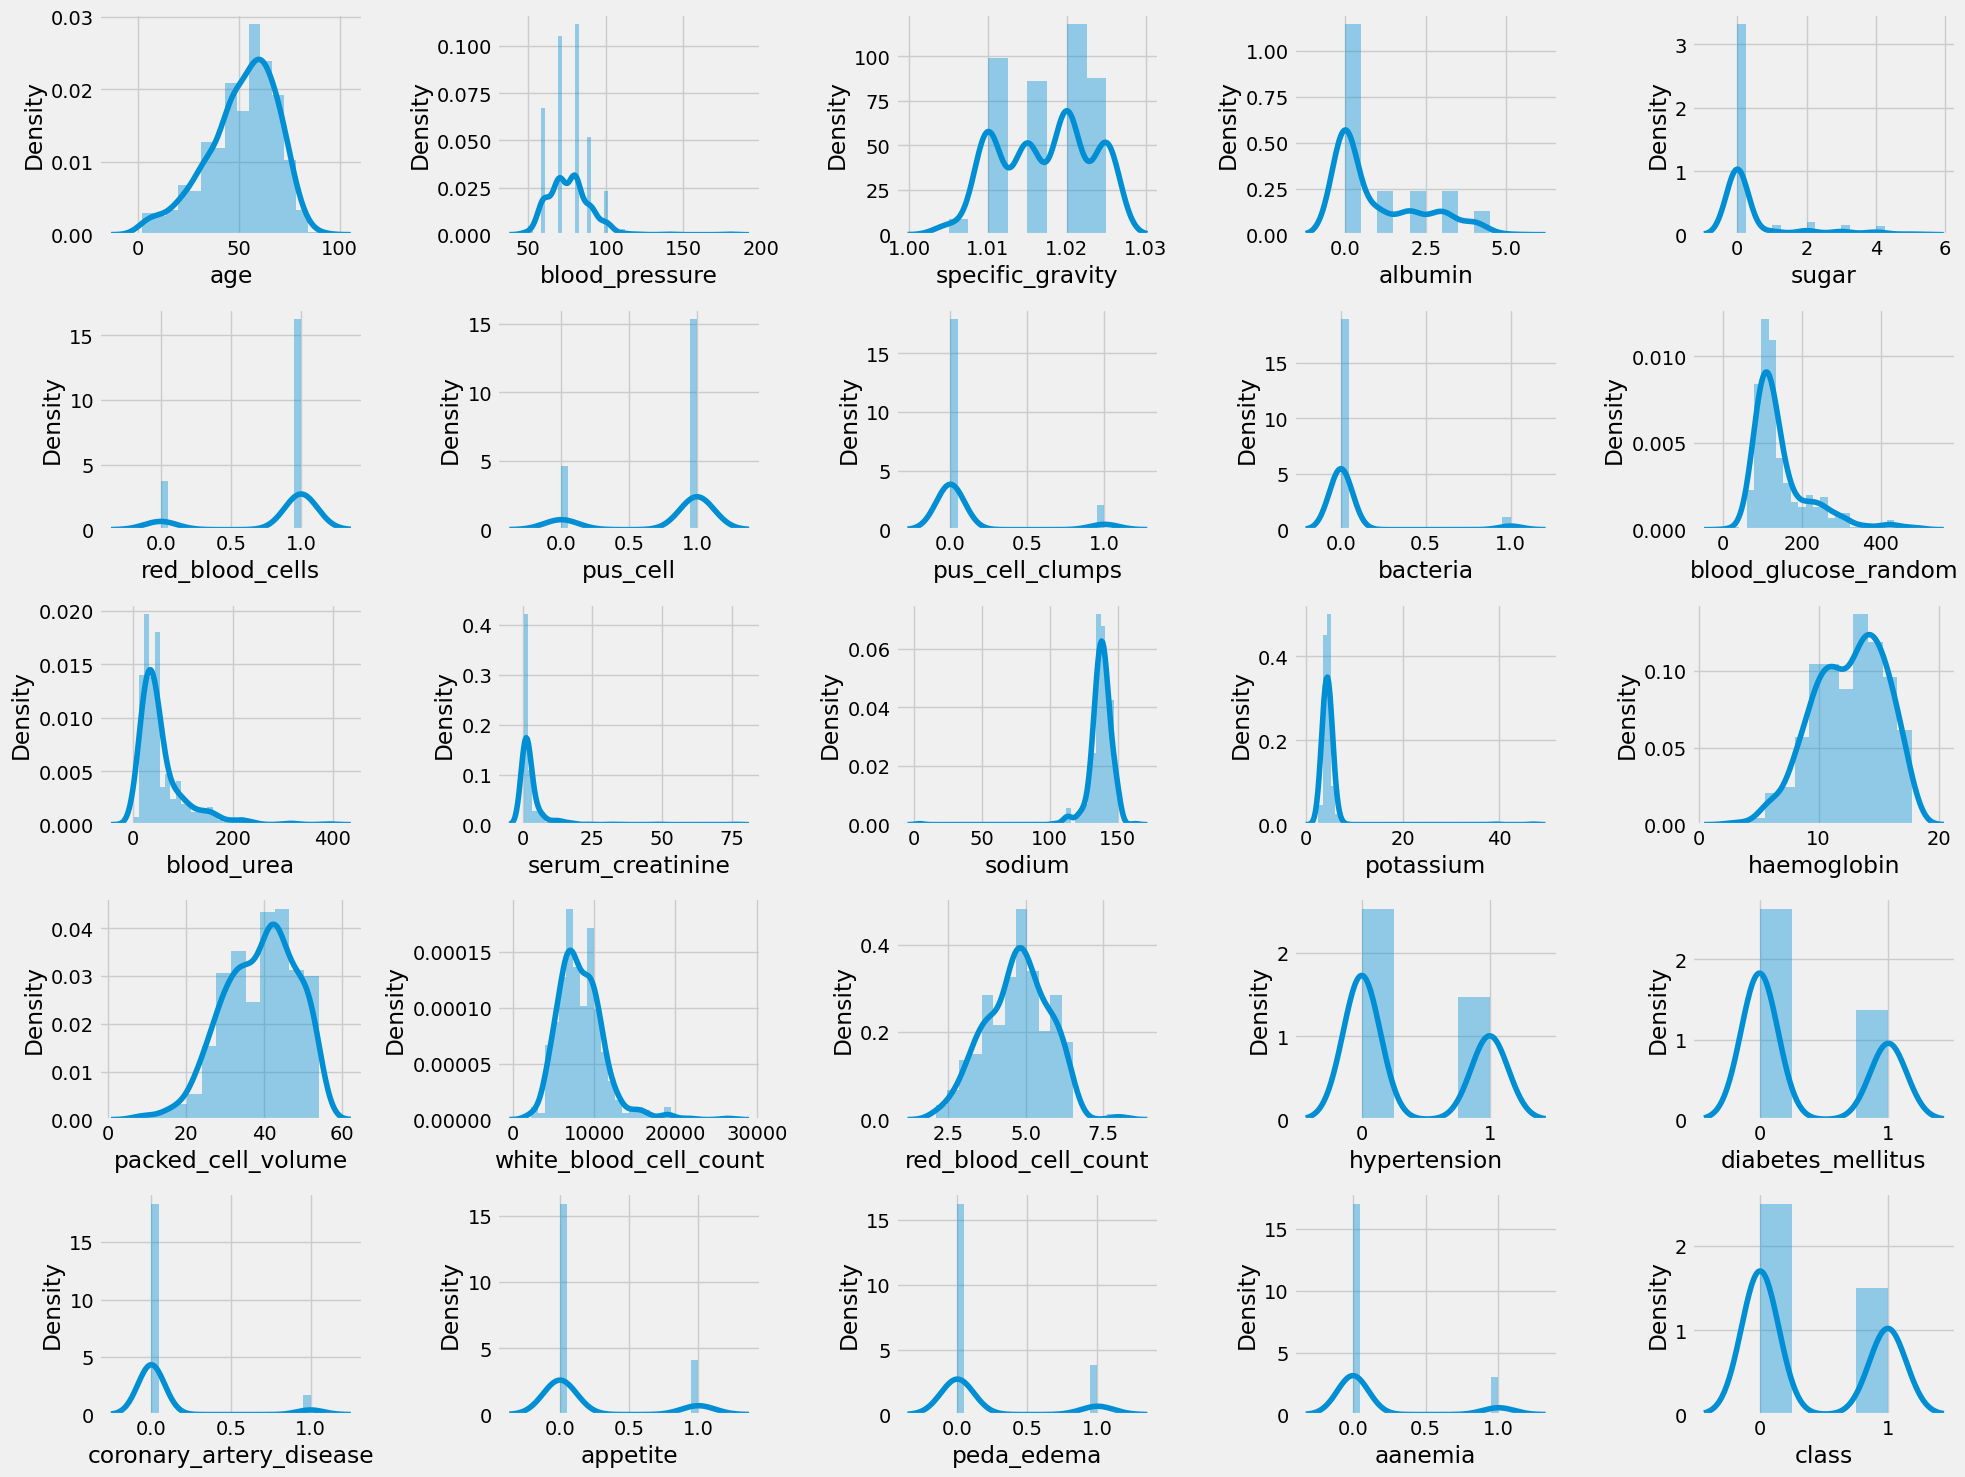

In [10]:
# checking numerical features distribution
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in num_cols:
    if plotnumber <= 25:
        ax = plt.subplot(5, 5, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

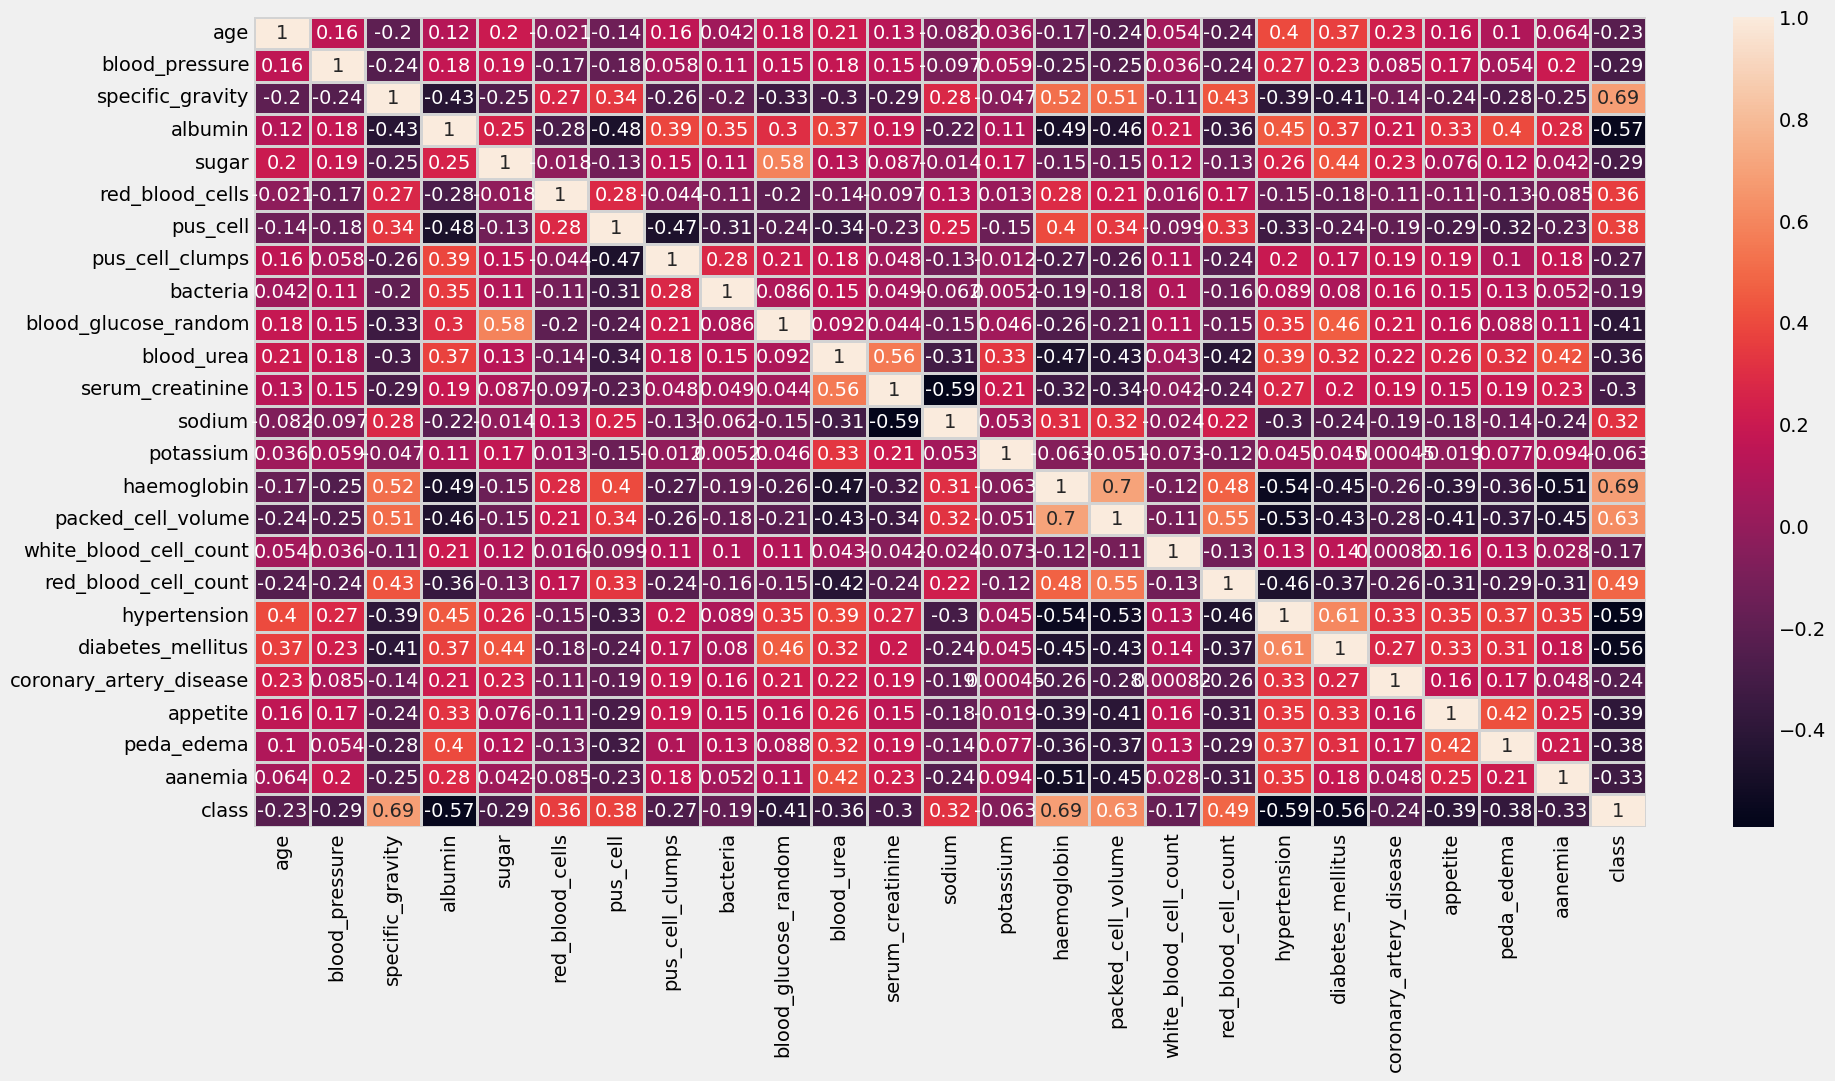

In [11]:
# heatmap of data
plt.figure(figsize = (20, 10))

sns.heatmap(df.corr(), annot = True, linewidths = 2, linecolor = 'lightgrey')
plt.show()

In [12]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

# Data Analysis

In [35]:
# defining functions to create plot

def violin(col):
    fig = px.violin(df, y=col, x="class", color="class", box=True, template = 'simple_white')
    return fig.show()

def kde(col):
    grid = sns.FacetGrid(df, hue="class", height = 6, aspect=2)
    grid.map(sns.kdeplot, col)
    grid.add_legend()
    
def scatter(col1, col2):
    fig = px.scatter(df, x=col1, y=col2, color="class", template = 'simple_white')
    return fig.show()

In [36]:
violin('red_blood_cell_count')

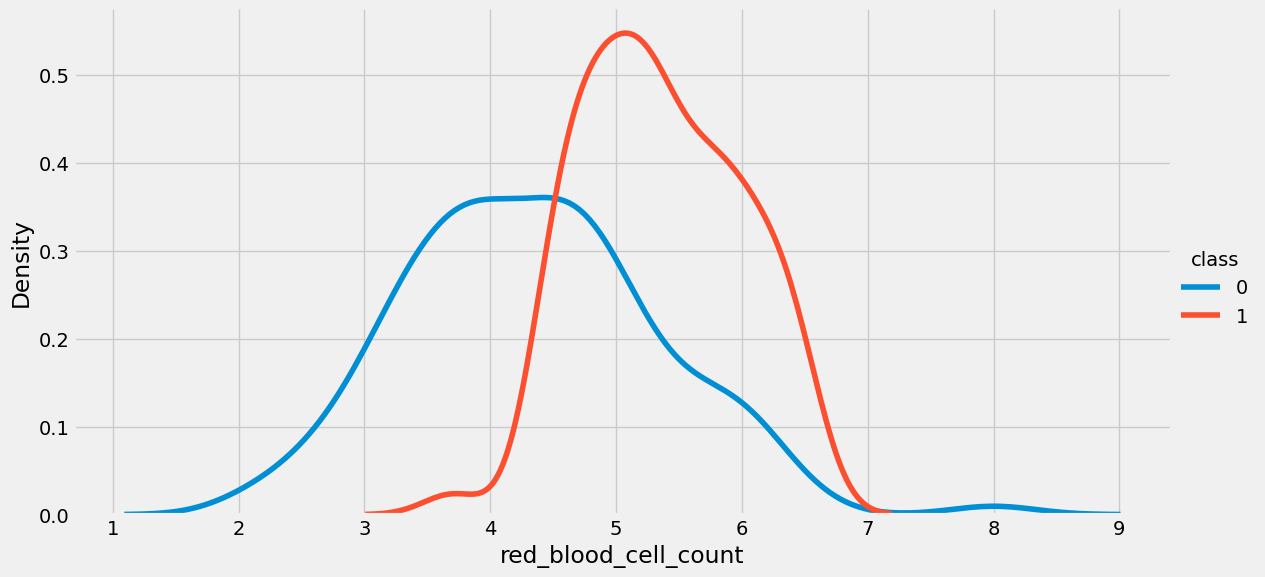

In [37]:
kde('red_blood_cell_count')

In [38]:
violin('white_blood_cell_count')

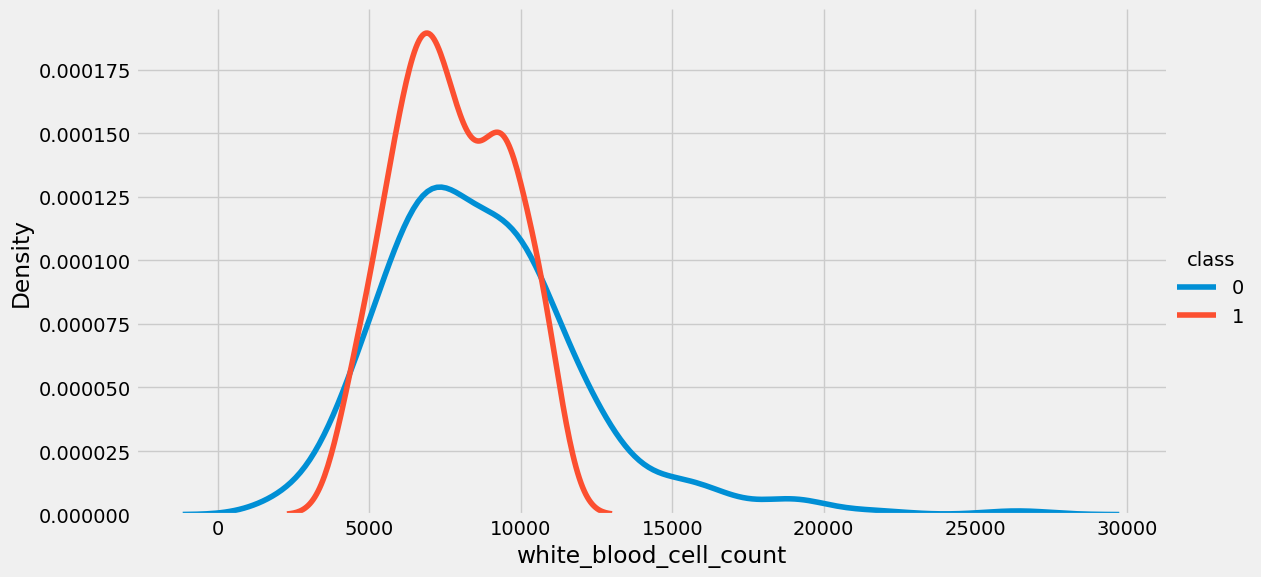

In [39]:
kde('white_blood_cell_count')

In [40]:
violin('packed_cell_volume')

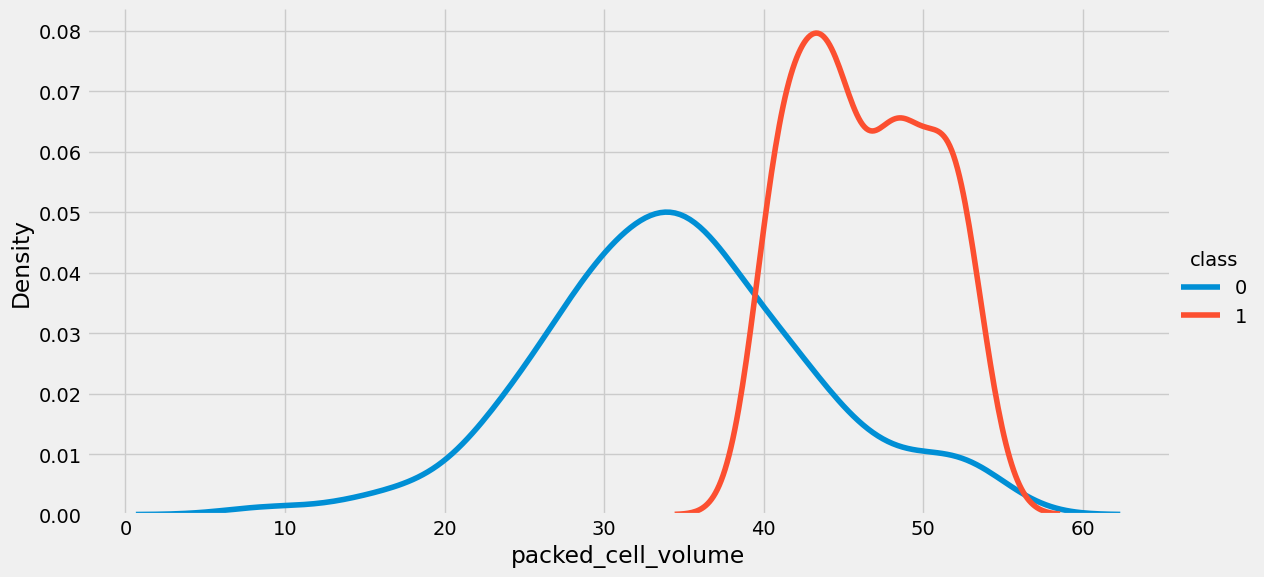

In [41]:
kde('packed_cell_volume')

In [42]:
violin('haemoglobin')

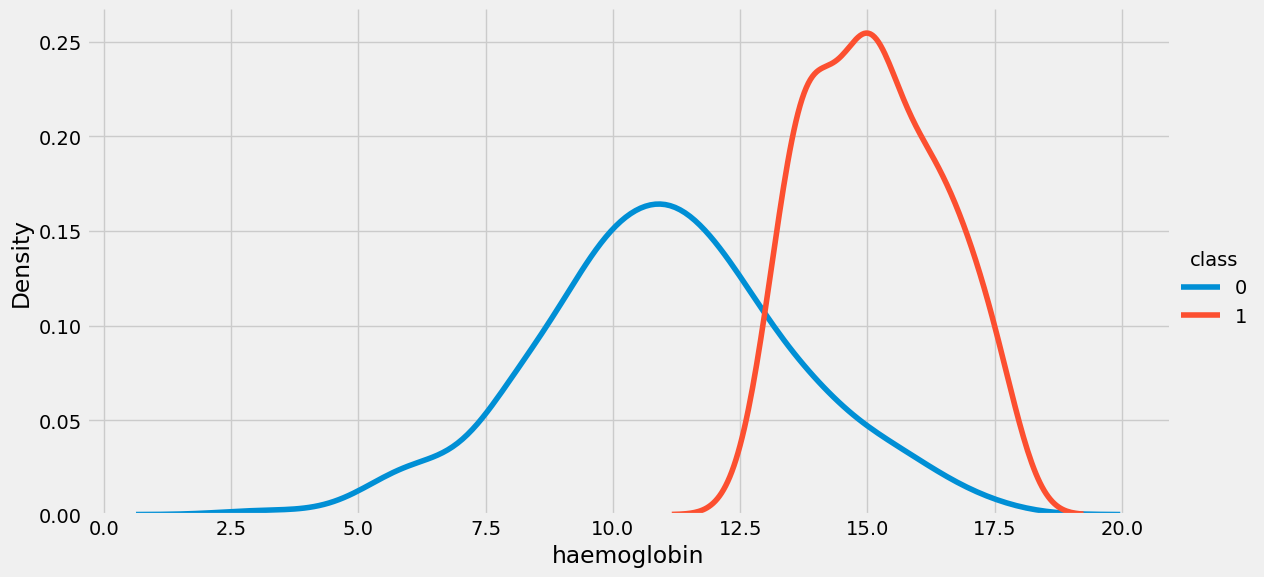

In [43]:
kde('haemoglobin')

In [44]:
violin('albumin')

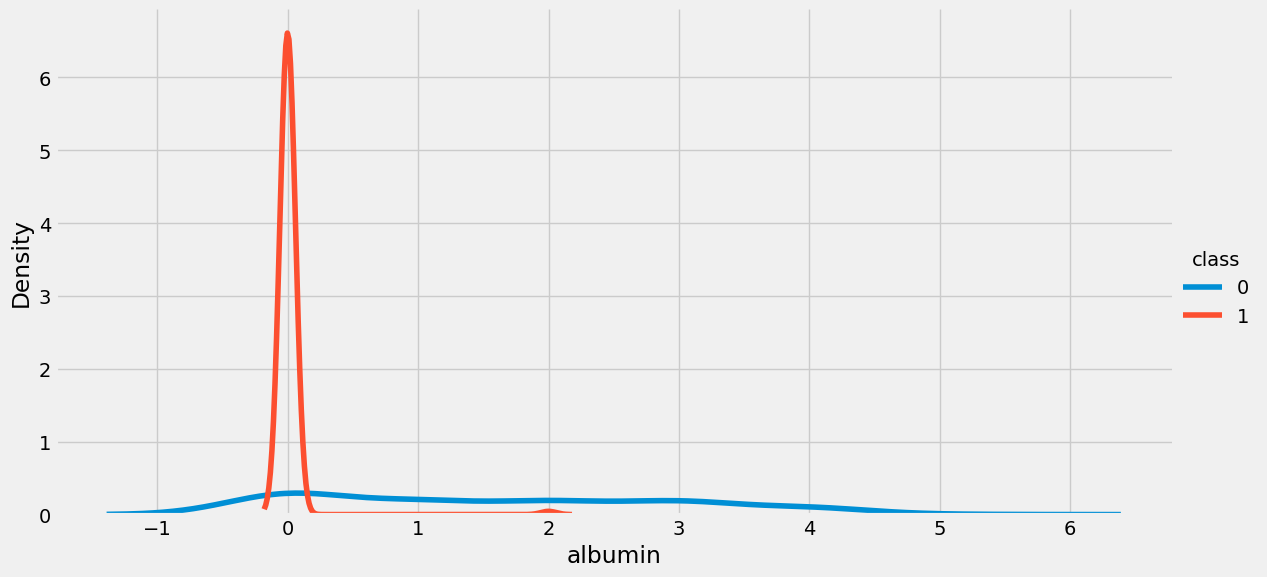

In [45]:
kde('albumin')

In [46]:
violin('blood_glucose_random')

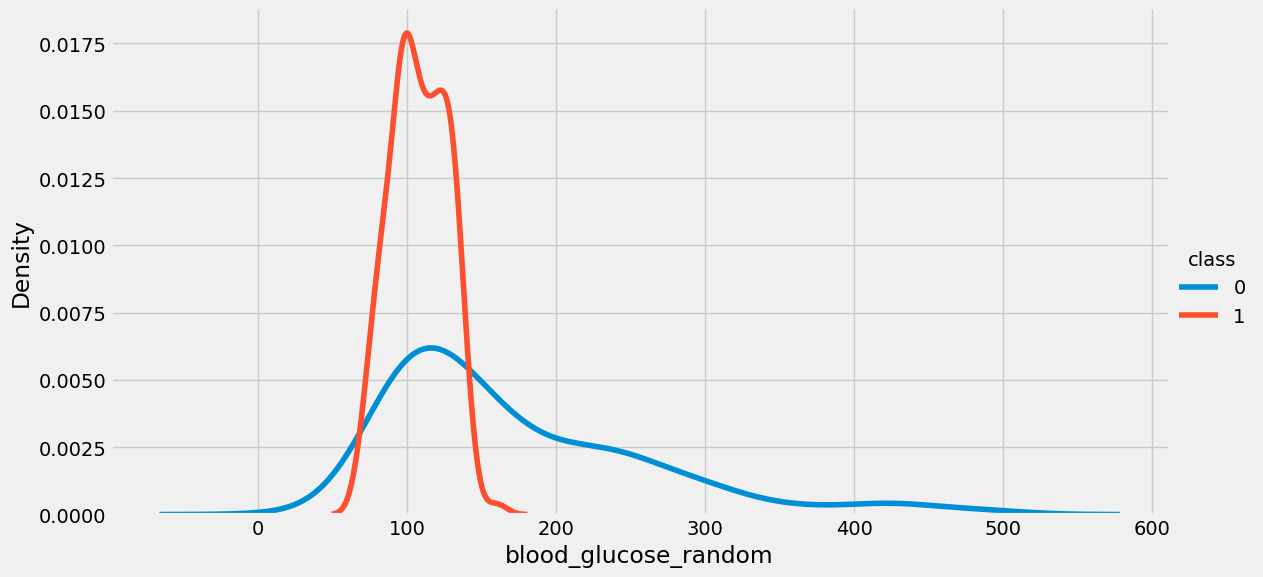

In [47]:
kde('blood_glucose_random')

In [48]:
violin('sodium')

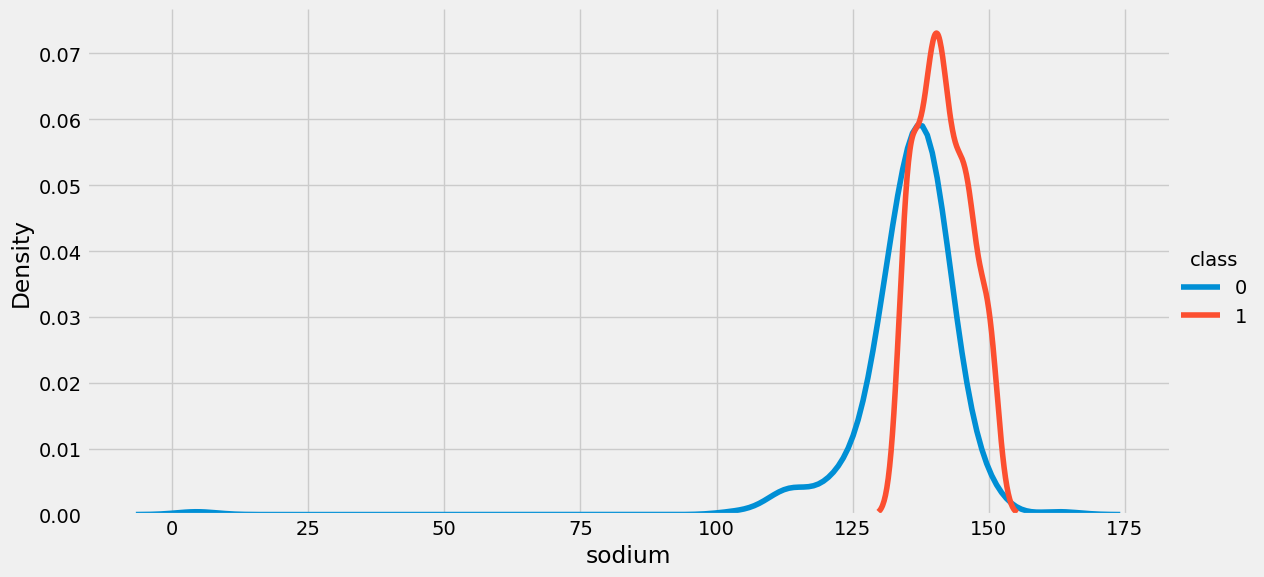

In [49]:
kde('sodium')

In [50]:
violin('blood_urea')

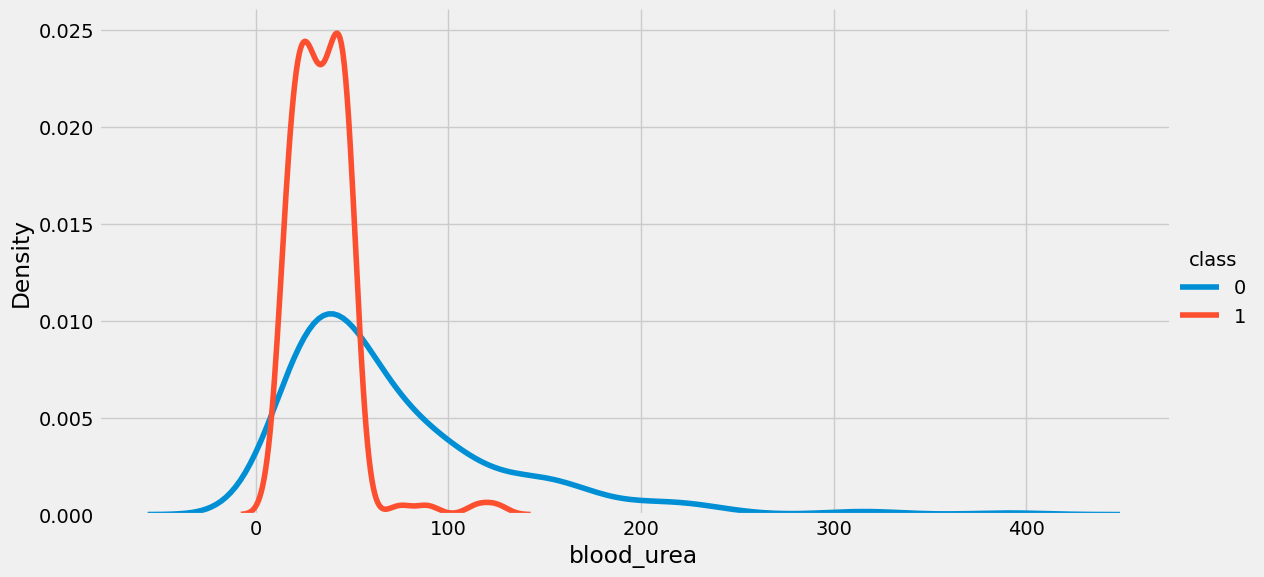

In [51]:
kde('blood_urea')

In [52]:
violin('specific_gravity')

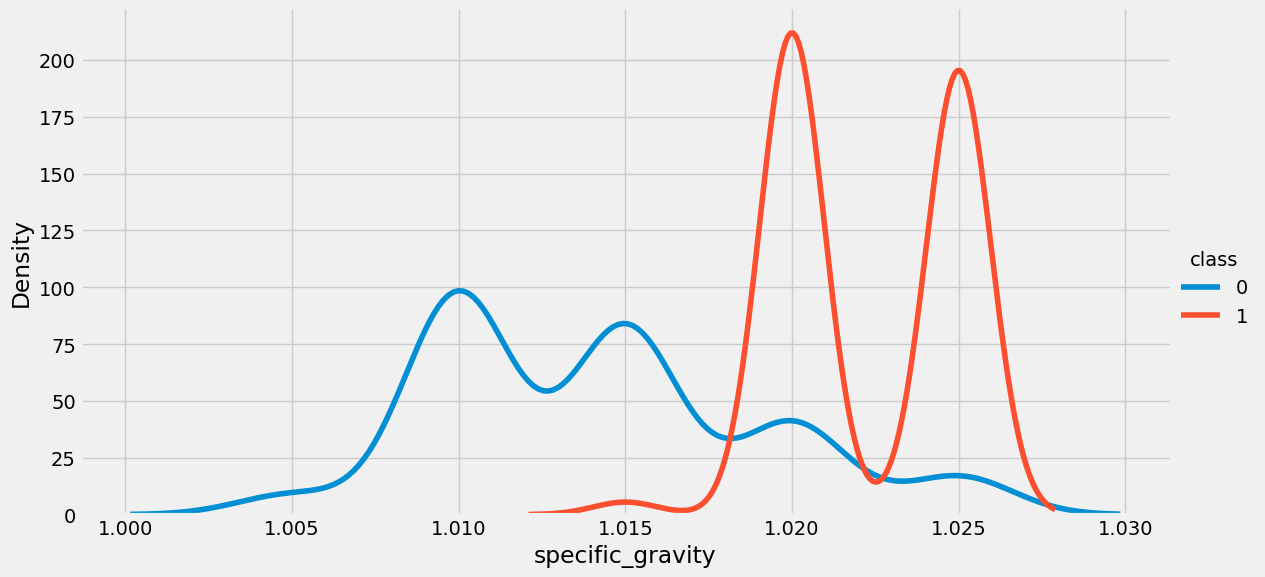

In [53]:
kde('specific_gravity')

In [54]:
violin('hypertension')

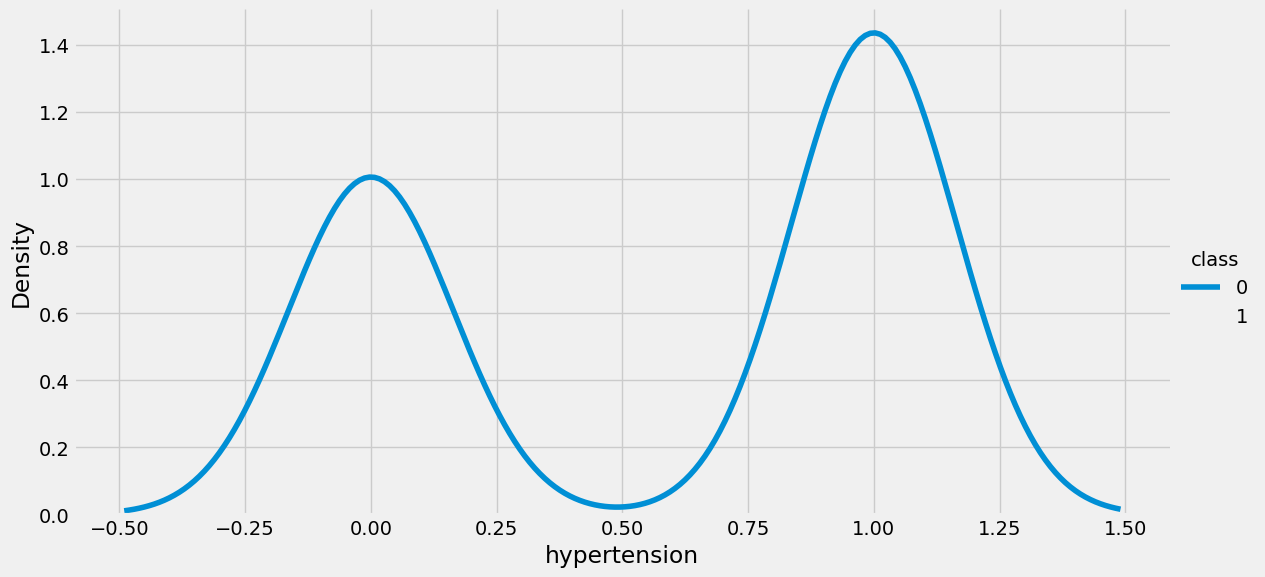

In [55]:
kde('hypertension')

In [56]:
violin('serum_creatinine')

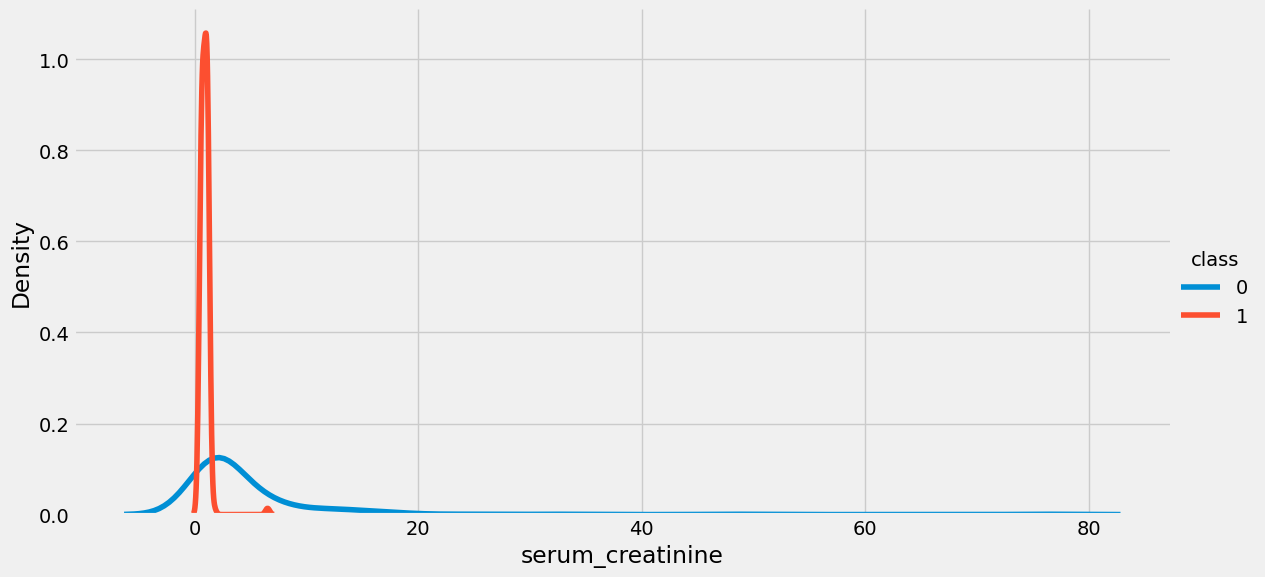

In [57]:
kde('serum_creatinine')

In [58]:
violin('diabetes_mellitus')

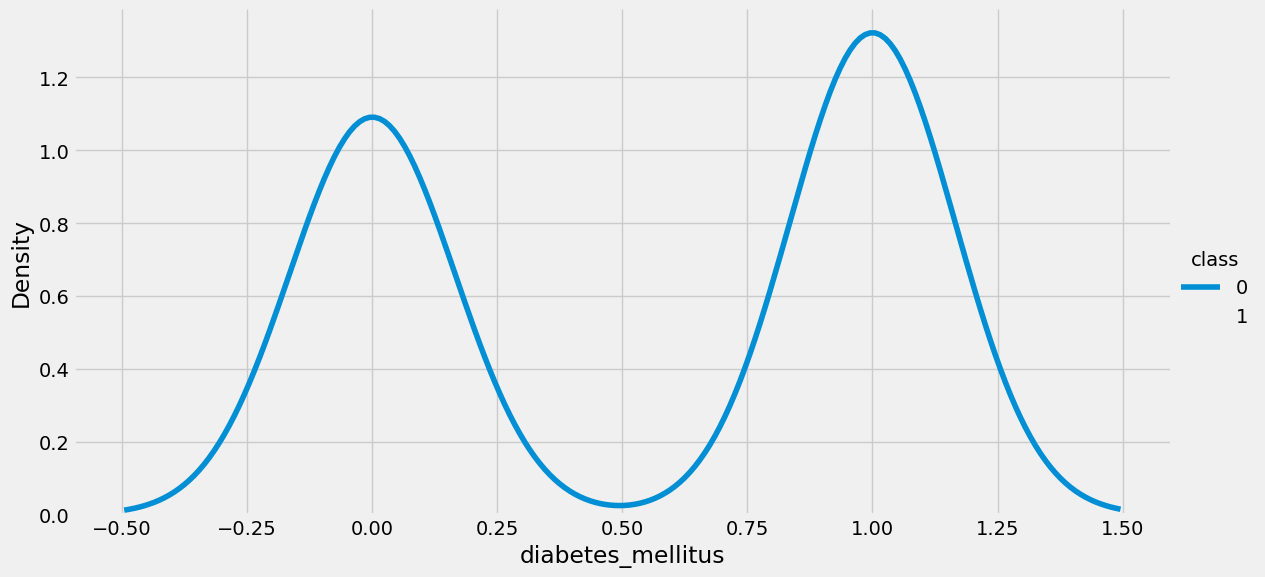

In [59]:
kde('diabetes_mellitus')

In [60]:
violin('blood_urea')

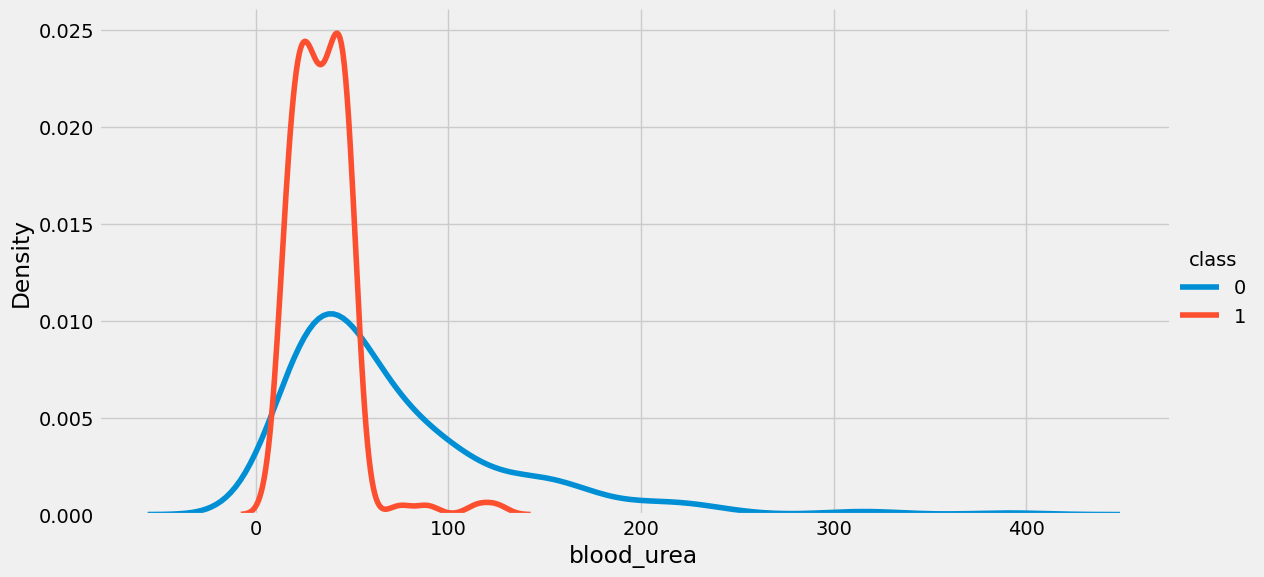

In [61]:
kde('blood_urea')

In [62]:
scatter('haemoglobin', 'packed_cell_volume')

In [63]:
scatter('red_blood_cell_count', 'packed_cell_volume')

In [64]:
scatter('red_blood_cell_count', 'albumin')

In [65]:
scatter('sugar', 'blood_glucose_random')

In [66]:
scatter('packed_cell_volume','blood_urea')

In [67]:
px.bar(df, x="specific_gravity", y="packed_cell_volume", color='class', barmode='group', template = 'plotly_dark', height = 400)

In [68]:
px.bar(df, x="specific_gravity", y="albumin", color='class', barmode='group', template = 'plotly_dark', height = 400)

In [69]:
px.bar(df, x="blood_pressure", y="packed_cell_volume", color='class', barmode='group', template = 'plotly_dark', height = 400)

In [70]:
px.bar(df, x="blood_pressure", y="haemoglobin", color='class', barmode='group', template = 'plotly_dark', height = 400)

# Data Pre Processing

In [ ]:
# checking for null values
df.isna().sum().sort_values(ascending = False)

age                        0
potassium                  0
aanemia                    0
peda_edema                 0
appetite                   0
coronary_artery_disease    0
diabetes_mellitus          0
hypertension               0
red_blood_cell_count       0
white_blood_cell_count     0
packed_cell_volume         0
haemoglobin                0
sodium                     0
blood_pressure             0
serum_creatinine           0
blood_urea                 0
blood_glucose_random       0
bacteria                   0
pus_cell_clumps            0
pus_cell                   0
red_blood_cells            0
sugar                      0
albumin                    0
specific_gravity           0
class                      0
dtype: int64

# Model Building

In [ ]:
ind_col = [col for col in df.columns if col != 'class']
dep_col = 'class'

X = df[ind_col]
Y = df[dep_col]

In [ ]:
# splitting data intp training and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 0)

## KNN

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of knn

knn_acc = accuracy_score(y_test, knn.predict(X_test))

print(f"Training Accuracy of KNN is {accuracy_score(y_train, knn.predict(X_train))}")
print(f"Test Accuracy of KNN is {knn_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, knn.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, knn.predict(X_test))}")

Training Accuracy of KNN is 0.8214285714285714
Test Accuracy of KNN is 0.6333333333333333 

Confusion Matrix :- 
[[52 20]
 [24 24]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.68      0.72      0.70        72
           1       0.55      0.50      0.52        48

    accuracy                           0.63       120
   macro avg       0.61      0.61      0.61       120
weighted avg       0.63      0.63      0.63       120



## Decision Tree Classifier

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 1.0
Test Accuracy of Decision Tree Classifier is 0.9666666666666667 

Confusion Matrix :- 
[[71  1]
 [ 3 45]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.98      0.94      0.96        48

    accuracy                           0.97       120
   macro avg       0.97      0.96      0.97       120
weighted avg       0.97      0.97      0.97       120



In [ ]:
# hyper parameter tuning of decision tree 
grid_param = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'splitter' : ['best', 'random'],
    'min_samples_leaf' : [1, 2, 3, 5, 7],
    'min_samples_split' : [1, 2, 3, 5, 7],
    'max_features' : ['auto', 'sqrt', 'log2']
}

grid_search_dtc = GridSearchCV(dtc, grid_param, cv = 5, n_jobs = -1, verbose = 1)
grid_search_dtc.fit(X_train, y_train)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [1, 2, 3, 5, 7],
                         'splitter': ['best', 'random']},
             verbose=1)

In [ ]:
# best parameters and best score
print(grid_search_dtc.best_params_)
print(grid_search_dtc.best_score_)

{'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 3, 'splitter': 'best'}
0.9928571428571429


In [ ]:
# best estimator
dtc = grid_search_dtc.best_estimator_

# accuracy score, confusion matrix and classification report of decision tree
dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")
print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 0.9857142857142858
Test Accuracy of Decision Tree Classifier is 0.925 

Confusion Matrix :- 
[[68  4]
 [ 5 43]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.93      0.94      0.94        72
           1       0.91      0.90      0.91        48

    accuracy                           0.93       120
   macro avg       0.92      0.92      0.92       120
weighted avg       0.92      0.93      0.92       120



## Random Forest Classifier

In [ ]:
rd_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 11, max_features = 'auto', min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
rd_clf.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of random forest
rd_clf_acc = accuracy_score(y_test, rd_clf.predict(X_test))

print(f"Training Accuracy of Random Forest Classifier is {accuracy_score(y_train, rd_clf.predict(X_train))}")
print(f"Test Accuracy of Random Forest Classifier is {rd_clf_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, rd_clf.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, rd_clf.predict(X_test))}")

Training Accuracy of Random Forest Classifier is 1.0
Test Accuracy of Random Forest Classifier is 0.975 

Confusion Matrix :- 
[[72  0]
 [ 3 45]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.94      0.97        48

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



## Ada Boost Classifier

In [ ]:
ada = AdaBoostClassifier(base_estimator = dtc)
ada.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of ada boost

ada_acc = accuracy_score(y_test, ada.predict(X_test))

print(f"Training Accuracy of Ada Boost Classifier is {accuracy_score(y_train, ada.predict(X_train))}")
print(f"Test Accuracy of Ada Boost Classifier is {ada_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, ada.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, ada.predict(X_test))}")

Training Accuracy of Ada Boost Classifier is 1.0
Test Accuracy of Ada Boost Classifier is 0.9916666666666667 

Confusion Matrix :- 
[[72  0]
 [ 1 47]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99        72
           1       1.00      0.98      0.99        48

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



## Gradient Boosting Classifier

In [ ]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of gradient boosting classifier

gb_acc = accuracy_score(y_test, gb.predict(X_test))

print(f"Training Accuracy of Gradient Boosting Classifier is {accuracy_score(y_train, gb.predict(X_train))}")
print(f"Test Accuracy of Gradient Boosting Classifier is {gb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, gb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, gb.predict(X_test))}")

Training Accuracy of Gradient Boosting Classifier is 1.0
Test Accuracy of Gradient Boosting Classifier is 0.9666666666666667 

Confusion Matrix :- 
[[71  1]
 [ 3 45]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.98      0.94      0.96        48

    accuracy                           0.97       120
   macro avg       0.97      0.96      0.97       120
weighted avg       0.97      0.97      0.97       120



## Stochastic Gradient Boosting (SGB)

In [ ]:
sgb = GradientBoostingClassifier(max_depth = 4, subsample = 0.90, max_features = 0.75, n_estimators = 200)
sgb.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of stochastic gradient boosting classifier

sgb_acc = accuracy_score(y_test, sgb.predict(X_test))

print(f"Training Accuracy of Stochastic Gradient Boosting is {accuracy_score(y_train, sgb.predict(X_train))}")
print(f"Test Accuracy of Stochastic Gradient Boosting is {sgb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, sgb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, sgb.predict(X_test))}")

Training Accuracy of Stochastic Gradient Boosting is 1.0
Test Accuracy of Stochastic Gradient Boosting is 0.975 

Confusion Matrix :- 
[[72  0]
 [ 3 45]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.94      0.97        48

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



## XgBoost

In [ ]:
xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.5, max_depth = 5, n_estimators = 150)
xgb.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of xgboost

xgb_acc = accuracy_score(y_test, xgb.predict(X_test))

print(f"Training Accuracy of XgBoost is {accuracy_score(y_train, xgb.predict(X_train))}")
print(f"Test Accuracy of XgBoost is {xgb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, xgb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, xgb.predict(X_test))}")

Training Accuracy of XgBoost is 1.0
Test Accuracy of XgBoost is 0.9833333333333333 

Confusion Matrix :- 
[[72  0]
 [ 2 46]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.96      0.98        48

    accuracy                           0.98       120
   macro avg       0.99      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



## Cat Boost Classifier

In [ ]:
cat = CatBoostClassifier(iterations=10)
cat.fit(X_train, y_train)

Learning rate set to 0.408198
0:	learn: 0.2594879	total: 48.8ms	remaining: 439ms
1:	learn: 0.1477855	total: 50.5ms	remaining: 202ms
2:	learn: 0.0865841	total: 51.7ms	remaining: 121ms
3:	learn: 0.0619813	total: 52.8ms	remaining: 79.2ms
4:	learn: 0.0430785	total: 54.5ms	remaining: 54.5ms
5:	learn: 0.0330154	total: 56.4ms	remaining: 37.6ms
6:	learn: 0.0290562	total: 58.1ms	remaining: 24.9ms
7:	learn: 0.0244787	total: 59.7ms	remaining: 14.9ms
8:	learn: 0.0208026	total: 61.4ms	remaining: 6.82ms
9:	learn: 0.0170351	total: 63ms	remaining: 0us


In [ ]:
# accuracy score, confusion matrix and classification report of cat boost

cat_acc = accuracy_score(y_test, cat.predict(X_test))

print(f"Training Accuracy of Cat Boost Classifier is {accuracy_score(y_train, cat.predict(X_train))}")
print(f"Test Accuracy of Cat Boost Classifier is {cat_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, cat.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, cat.predict(X_test))}")

Training Accuracy of Cat Boost Classifier is 1.0
Test Accuracy of Cat Boost Classifier is 0.9916666666666667 

Confusion Matrix :- 
[[72  0]
 [ 1 47]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99        72
           1       1.00      0.98      0.99        48

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



## Extra Trees Classifier

In [ ]:
etc = ExtraTreesClassifier()
etc.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of extra trees classifier

etc_acc = accuracy_score(y_test, etc.predict(X_test))

print(f"Training Accuracy of Extra Trees Classifier is {accuracy_score(y_train, etc.predict(X_train))}")
print(f"Test Accuracy of Extra Trees Classifier is {etc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, etc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, etc.predict(X_test))}")

Training Accuracy of Extra Trees Classifier is 1.0
Test Accuracy of Extra Trees Classifier is 0.9833333333333333 

Confusion Matrix :- 
[[72  0]
 [ 2 46]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.96      0.98        48

    accuracy                           0.98       120
   macro avg       0.99      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



## LGBM Classifier

In [ ]:
lgbm = LGBMClassifier(learning_rate = 1)
lgbm.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of lgbm classifier

lgbm_acc = accuracy_score(y_test, lgbm.predict(X_test))

print(f"Training Accuracy of LGBM Classifier is {accuracy_score(y_train, lgbm.predict(X_train))}")
print(f"Test Accuracy of LGBM Classifier is {lgbm_acc} \n")

print(f"{confusion_matrix(y_test, lgbm.predict(X_test))}\n")
print(classification_report(y_test, lgbm.predict(X_test)))

Training Accuracy of LGBM Classifier is 1.0
Test Accuracy of LGBM Classifier is 0.9833333333333333 

[[72  0]
 [ 2 46]]

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.96      0.98        48

    accuracy                           0.98       120
   macro avg       0.99      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



## Models Comparison

In [ ]:
models = pd.DataFrame({
    'Model' : [ 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier','Ada Boost Classifier',
             'Gradient Boosting Classifier', 'Stochastic Gradient Boosting', 'XgBoost', 'Cat Boost', 'Extra Trees Classifier', "LGBM Classifier"],
    'Score' : [knn_acc, dtc_acc, rd_clf_acc, ada_acc, gb_acc, sgb_acc, xgb_acc, cat_acc, etc_acc, lgbm_acc]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
3,Ada Boost Classifier,0.991667
7,Cat Boost,0.991667
6,XgBoost,0.983333
8,Extra Trees Classifier,0.983333
9,LGBM Classifier,0.983333
2,Random Forest Classifier,0.975000
5,Stochastic Gradient Boosting,0.975000
4,Gradient Boosting Classifier,0.966667
1,Decision Tree Classifier,0.925000
0,KNN,0.633333


In [ ]:
px.bar(data_frame = models, x = 'Model', y = 'Score', color = 'Score', template = 'plotly_dark', 
       title = 'Models Comparison')

## Generating a Model

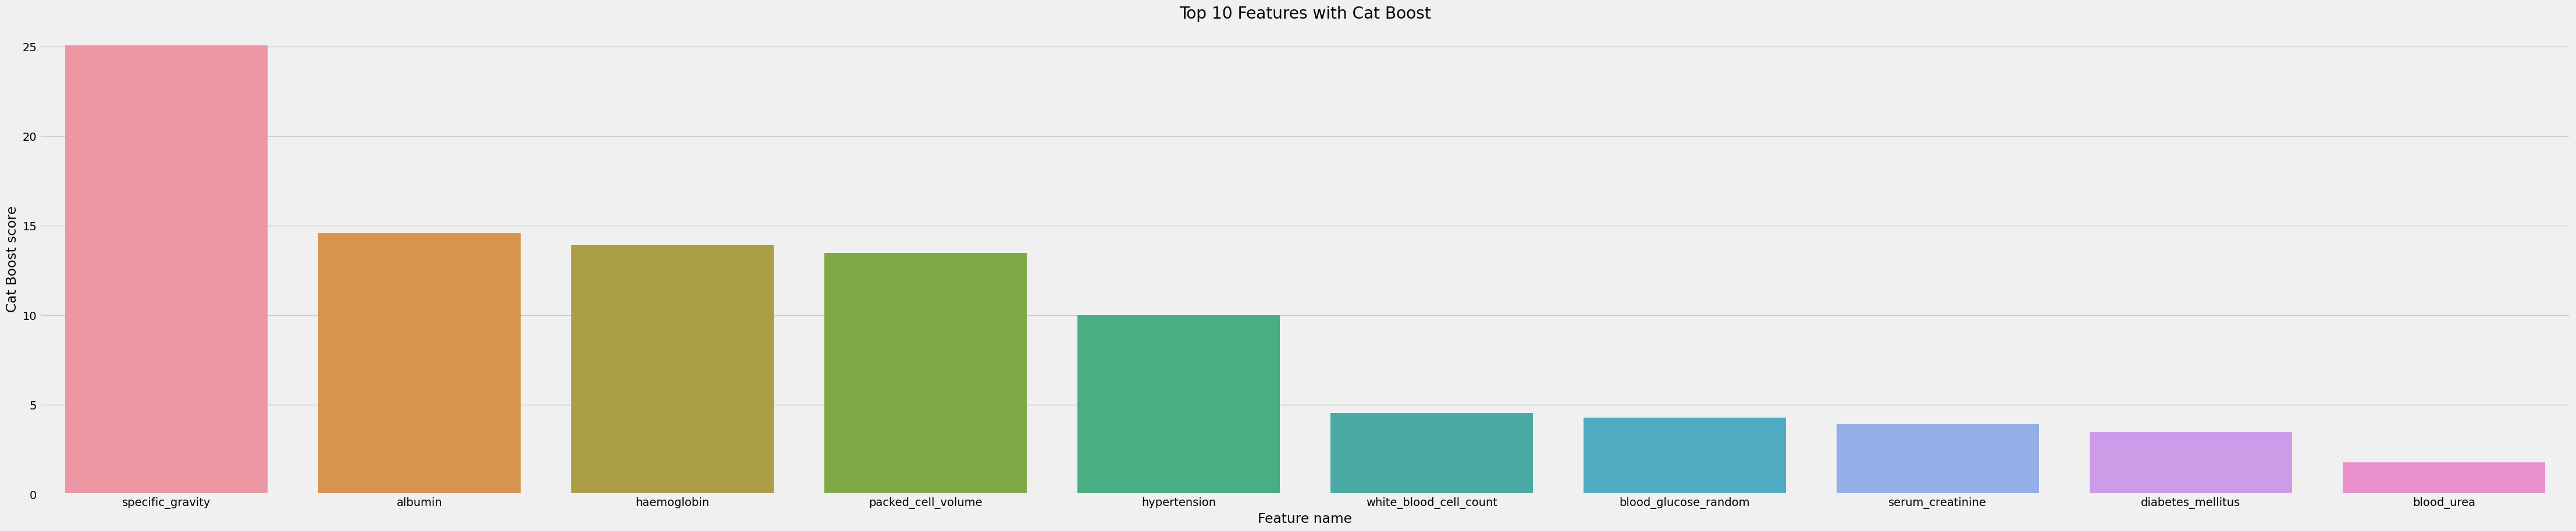

In [ ]:
#Features Score
feature_scores=pd.DataFrame(cat.feature_importances_,columns=['Score'],index=X_train.columns).sort_values(by='Score',ascending=False)
top10_feature = feature_scores.nlargest(n=10, columns=['Score'])

plt.figure(figsize=(50,10))
g = sns.barplot(x=top10_feature.index, y=top10_feature['Score'])
p = plt.title('Top 10 Features with Cat Boost')
p = plt.xlabel('Feature name')
p = plt.ylabel('Cat Boost score')
p = g.set_xticklabels(g.get_xticklabels(), horizontalalignment='center')

In [ ]:
top10_feature.index

Index(['specific_gravity', 'albumin', 'haemoglobin', 'packed_cell_volume',
       'hypertension', 'white_blood_cell_count', 'blood_glucose_random',
       'serum_creatinine', 'diabetes_mellitus', 'blood_urea'],
      dtype='object')

In [ ]:
X.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia'],
      dtype='object')

In [ ]:
for ele in X.columns:
  if ele not in top10_feature.index:
    X = X.drop(ele, axis = 1)

In [ ]:
X.head()

,specific_gravity,albumin,blood_glucose_random,blood_urea,serum_creatinine,haemoglobin,packed_cell_volume,white_blood_cell_count,hypertension,diabetes_mellitus
0,1.020,1,121,36.0,1.2,15.4,44,7800,1,1
1,1.020,4,88,18.0,0.8,11.3,38,6000,0,0
2,1.010,2,423,53.0,1.8,9.6,31,7500,0,1
3,1.005,4,117,56.0,3.8,11.2,32,6700,1,0
4,1.010,2,106,26.0,1.4,11.6,35,7300,0,0


In [ ]:
X_train=X_train[top10_feature.index]
X_test=X_test[top10_feature.index]
cat.fit(X_train.append(X_test),y_train.append(y_test))

Learning rate set to 0.47535
0:	learn: 0.4480530	total: 2.93ms	remaining: 26.3ms
1:	learn: 0.3246331	total: 4.94ms	remaining: 19.7ms
2:	learn: 0.2401683	total: 8.53ms	remaining: 19.9ms
3:	learn: 0.1874110	total: 9.98ms	remaining: 15ms
4:	learn: 0.1476749	total: 11.5ms	remaining: 11.5ms
5:	learn: 0.1273570	total: 12.6ms	remaining: 8.4ms
6:	learn: 0.1107396	total: 13.6ms	remaining: 5.84ms
7:	learn: 0.0988195	total: 14.9ms	remaining: 3.72ms
8:	learn: 0.0901715	total: 16ms	remaining: 1.77ms
9:	learn: 0.0817315	total: 17ms	remaining: 0us


# Testing

In [ ]:
# Prediction 1
prediction = cat.predict_proba([[1.020,0,70,40,0.5,19,50,10500,0,0]])[0][0]
if prediction>0.5:
  print('Oops! You have Chronic Kidney Disease.')
else:
  print("Great! You don't have Chronic Kidney Disease.")

Great! You don't have Chronic Kidney Disease.


In [ ]:
# Prediction 2
prediction = cat.predict_proba([[1.005,4,140,50,3.8,15,37,3700,1,1]])[0][0]
if prediction>0.5:
  print('Oops! You have Chronic Kidney Disease.')
else:
  print("Great! You don't have Chronic Kidney Disease.")

Oops! You have Chronic Kidney Disease.


# Saving Model

In [ ]:
import pickle
pickle.dump(cat,open("cat_model.pkl","wb"))